In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

In [25]:
df = pd.read_excel(r"C:\Users\mferna16\Downloads\Carreritas\entrenam.xlsx")
df = df.rename(columns=df.iloc[0]).drop(df.index[0])
df["Año"] = df.rename(columns={"Año": "Year"}, inplace=True)
df

,Week,Fecha,Mes,Year,Horario,Temp,Día,Lugar,Dist,Ritmo,...,14km,15km,16km,17km,18km,19km,20km,21km,22km,Año
1,46,2013-11-11 00:00:00,11,2013,03-T-N,22,lun,Palermo,4.73,00:08:06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
2,46,2013-11-13 00:00:00,11,2013,03-T-N,24,mié,Pza Alem,6.1,00:08:09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
3,46,2013-11-14 00:00:00,11,2013,03-T-N,28,jue,Pza Alem,0.88,00:07:14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
4,46,2013-11-14 00:00:00,11,2013,03-T-N,28,jue,Pza Alem,1.45,00:06:58,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
5,46,2013-11-16 00:00:00,11,2013,03-T-N,21,sáb,Pza Alem,4.07,00:08:25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,28,2022-07-07 00:00:00,7,2022,03-T-N,NaN,jue,Pza Alem,4.27,00:07:07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
278,28,2022-07-07 00:00:00,7,2022,03-T-N,NaN,jue,Pza Alem,0.83,00:09:03,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
279,29,2022-07-10 00:00:00,7,2022,02-Tarde,NaN,dom,Pza Alem,5.02,00:06:37,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
280,29,2022-07-12 00:00:00,7,2022,03-T-N,NaN,mar,Pza Alem,2.54,00:07:19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 281 entries, 1 to 281
Data columns (total 45 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Week          281 non-null    object
 1   Fecha         281 non-null    object
 2   Mes           281 non-null    object
 3   Year          281 non-null    object
 4   Horario       281 non-null    object
 5   Temp          210 non-null    object
 6   Día           281 non-null    object
 7   Lugar         281 non-null    object
 8   Dist          281 non-null    object
 9   Ritmo         281 non-null    object
 10  Tiempo        281 non-null    object
 11  Tiempo2       281 non-null    object
 12  Horas         281 non-null    object
 13  mins          281 non-null    object
 14  sec           281 non-null    object
 15  Hora en mins  281 non-null    object
 16  Durac en hs   281 non-null    object
 17  Cant. Kms     281 non-null    object
 18  Cal           281 non-null    object
 19  Evento? 

In [27]:
df["Dist"] = df["Dist"].astype(np.int64)
df["Fecha"] = pd.to_datetime(df["Fecha"])
df["Hora en mins"] = df["Hora en mins"].astype(np.float64)
df["Durac en hs"] = df["Durac en hs"].astype(np.float64)
df["Cant. Kms"] = df["Cant. Kms"].astype(np.int64)
df["Cal"] = df["Cal"].astype(np.int64)
df["Year"] = df["Year"].astype(np.int64)
df["Elevación"] = df["Elevación"].fillna(df["Elevación"].median)
df["Cadencia"] = df["Cadencia"].fillna(df["Cadencia"].median)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 281 entries, 1 to 281
Data columns (total 45 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Week          281 non-null    object        
 1   Fecha         281 non-null    datetime64[ns]
 2   Mes           281 non-null    object        
 3   Year          281 non-null    int64         
 4   Horario       281 non-null    object        
 5   Temp          210 non-null    object        
 6   Día           281 non-null    object        
 7   Lugar         281 non-null    object        
 8   Dist          281 non-null    int64         
 9   Ritmo         281 non-null    object        
 10  Tiempo        281 non-null    object        
 11  Tiempo2       281 non-null    object        
 12  Horas         281 non-null    object        
 13  mins          281 non-null    object        
 14  sec           281 non-null    object        
 15  Hora en mins  281 non-null    float64   

In [28]:
kms_por_año = df.pivot_table(index=["Year"], aggfunc={"Dist":sum}).sort_values("Dist", ascending=False)
kms_por_año

,Dist
Year,
2014,426
2019,224
2022,224
2015,161
2013,100
2017,92
2018,83
2021,23
2020,16


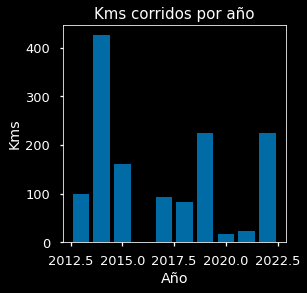

In [29]:
plt.figure(figsize=(4,4))
plt.bar(x=kms_por_año.index, height=kms_por_año["Dist"])
plt.style.use(style="dark_background")
plt.title("Kms corridos por año", size=15)
plt.xlabel("Año")
plt.ylabel("Kms")
plt.show()

In [30]:
kms_por_fecha = df.pivot_table(index = ["Fecha"], aggfunc={"Dist":sum})
kms_por_fecha

,Dist
Fecha,
2013-11-11,4
2013-11-13,6
2013-11-14,1
2013-11-16,4
2013-11-17,2
...,...
2022-07-05,2
2022-07-07,4
2022-07-10,5


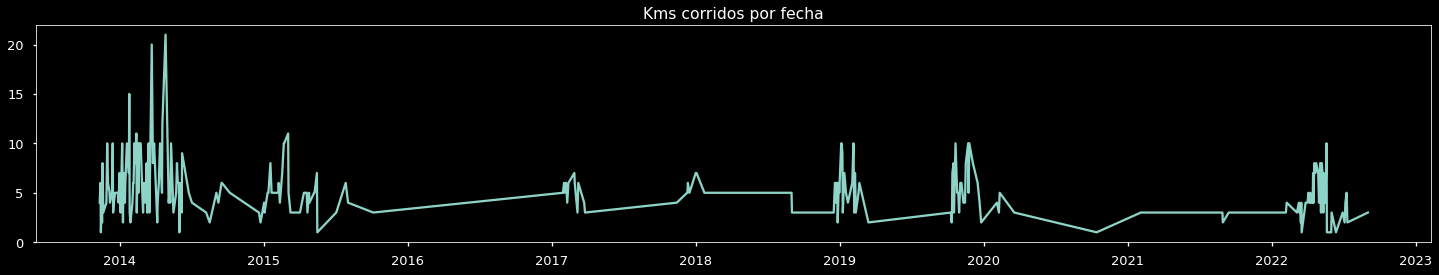

In [31]:
plt.figure(figsize=(25,4))
plt.plot(kms_por_fecha)
plt.style.use(style="seaborn-pastel")
plt.title("Kms corridos por fecha")
plt.show()


In [32]:
kms_por_mes = df.pivot_table(index=["Mes"], aggfunc={"Dist":sum})
kms_por_mes

,Dist
Mes,
1,188
2,247
3,156
4,171
5,145
6,32
7,35
8,14
9,35


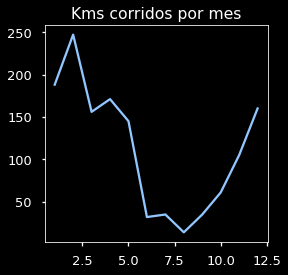

In [33]:
plt.figure(figsize=(4,4))
plt.plot(kms_por_mes)
plt.style.use(style="tableau-colorblind10")
plt.title("Kms corridos por mes")
plt.show()

In [34]:
mediana_kms_por_mes = df.pivot_table(index=["Mes"], aggfunc={"Dist":"median"}).round(2)
mediana_kms_por_mes

,Dist
Mes,
1,5.0
2,5.0
3,3.0
4,4.0
5,5.0
6,3.0
7,3.0
8,3.0
9,4.5


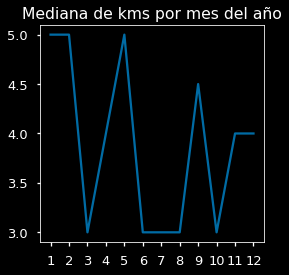

In [35]:
meses =[1,2,3,4,5,6,7,8,9,10,11,12]
plt.figure(figsize=(4,4))
plt.plot(mediana_kms_por_mes.index, mediana_kms_por_mes.values)
plt.xticks(meses)
plt.style.use("seaborn-talk")
plt.title("Mediana de kms por mes del año")
plt.show()

In [36]:
horario = df.pivot_table(index=["Horario"], aggfunc={"Dist":sum}).sort_values("Dist", ascending=True)
horario

,Dist
Horario,
04-Noche,67
02-Tarde,145
01-Mañana,163
03-T-N,974


In [38]:
colores = ['lightcoral','indianred','firebrick','darkred']
values = [163, 145, 971, 67]
plt.figure(figsize=(4,4))
fig = px.pie(horario,
             values='Dist', 
             names=horario.index,
             hover_data=['Dist'],  
             title='Distancia corrida por momento del día', 
             color='Dist')
fig.update_traces(textfont_size=20,
                  marker=dict(colors=colores, line=dict(color='grey', width=2)))
fig.show()

<Figure size 288x288 with 0 Axes>